In [1]:
import os
os.chdir('../py')

import pandas as pd
import numpy as np
import feather

from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams['font.family'] = 'Ricty Diminised'
sns.set(style="whitegrid", font='Ricty Diminised', palette="muted", color_codes=True, rc={'grid.linestyle': '--'})
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]

import japanize_matplotlib

from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold
from sklearn.preprocessing import LabelEncoder

# my modules
import EDA
import utils

In [12]:
%load_ext autoreload

In [13]:
%autoreload

In [2]:
DIR = '../input/feather/'

In [3]:
train = feather.read_dataframe(DIR + 'train.ftr')
test  = feather.read_dataframe(DIR + 'test.ftr')

In [4]:
categorical_features = train.columns[train.dtypes == 'object']

ProductCD


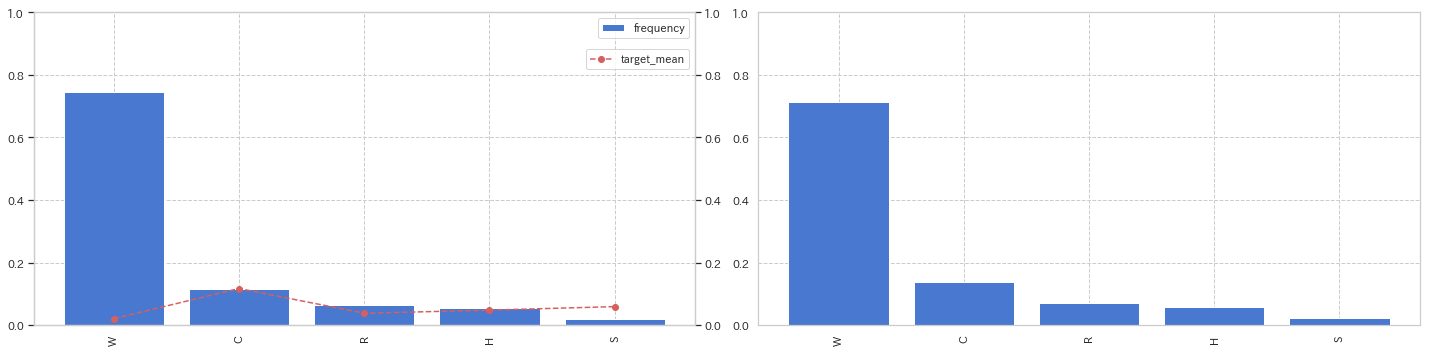

card4


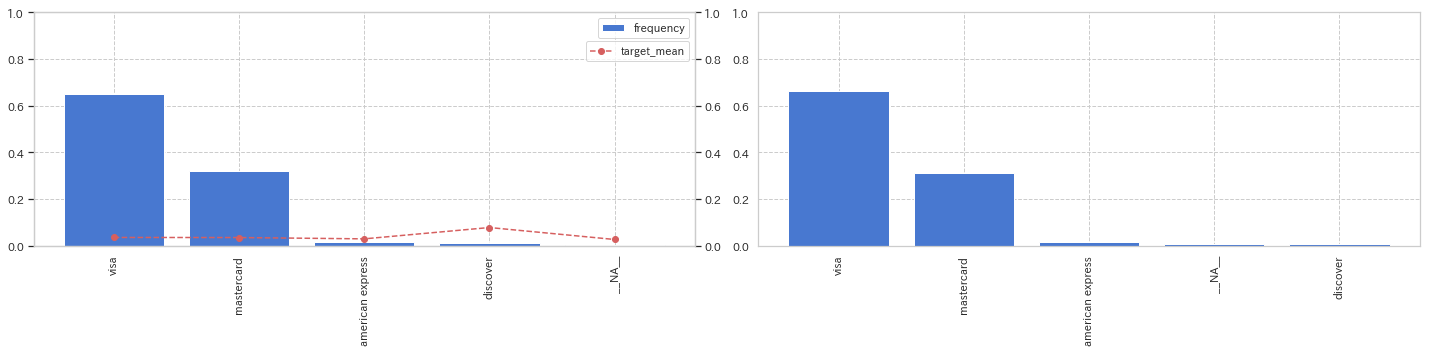

card6


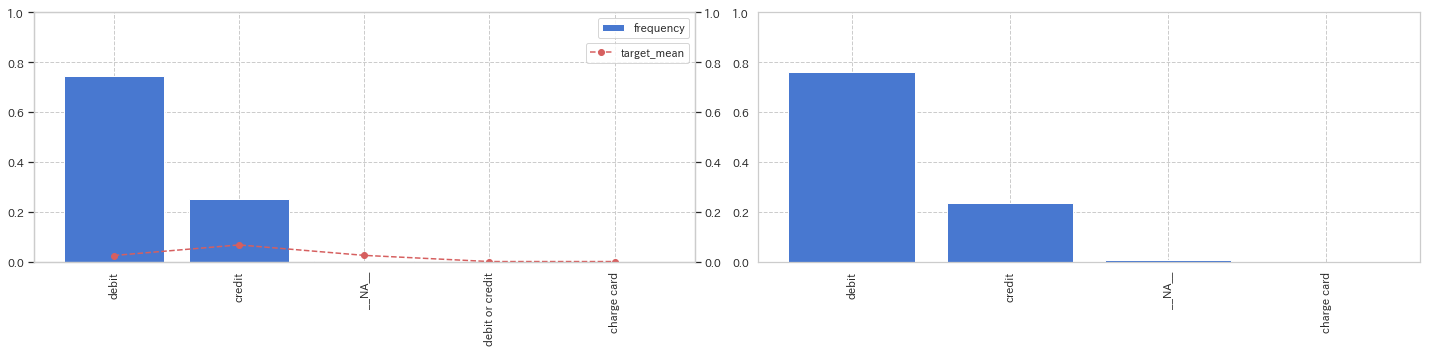

P_emaildomain


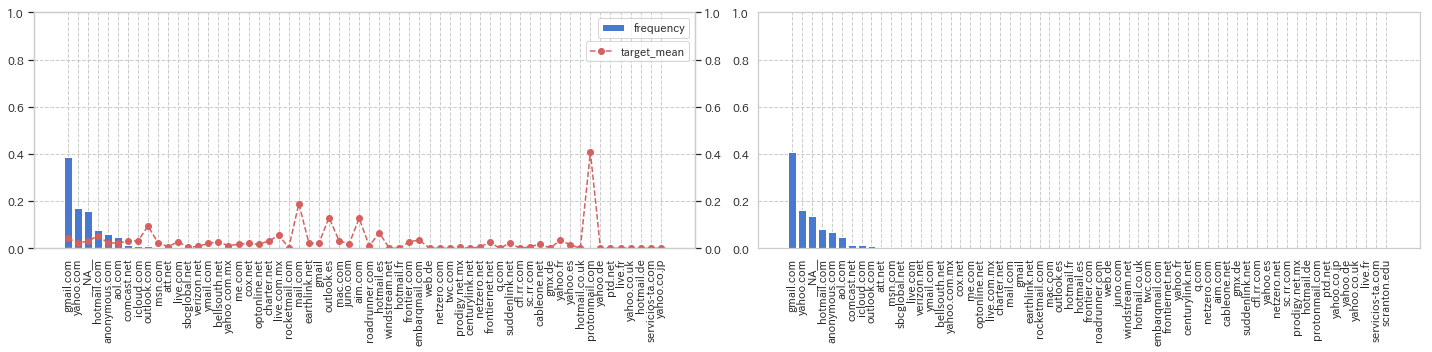

R_emaildomain


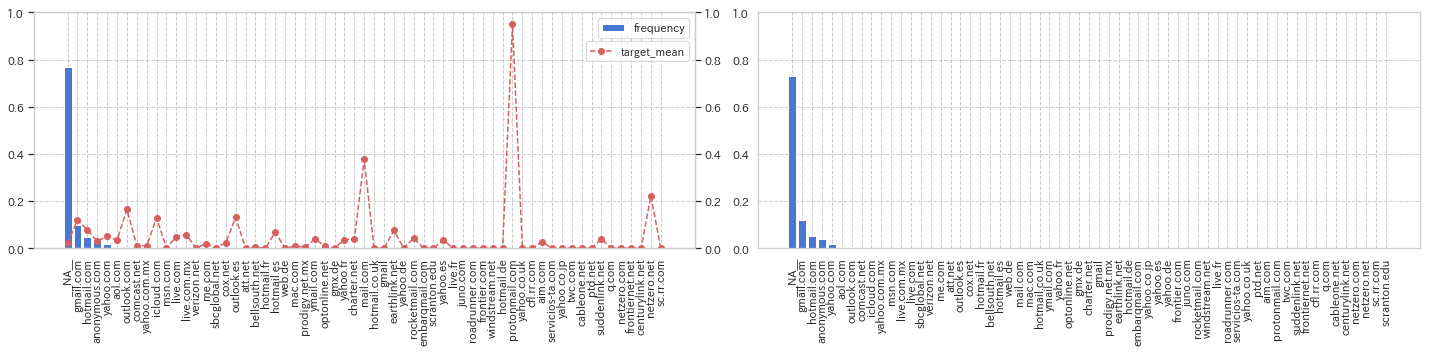

M1


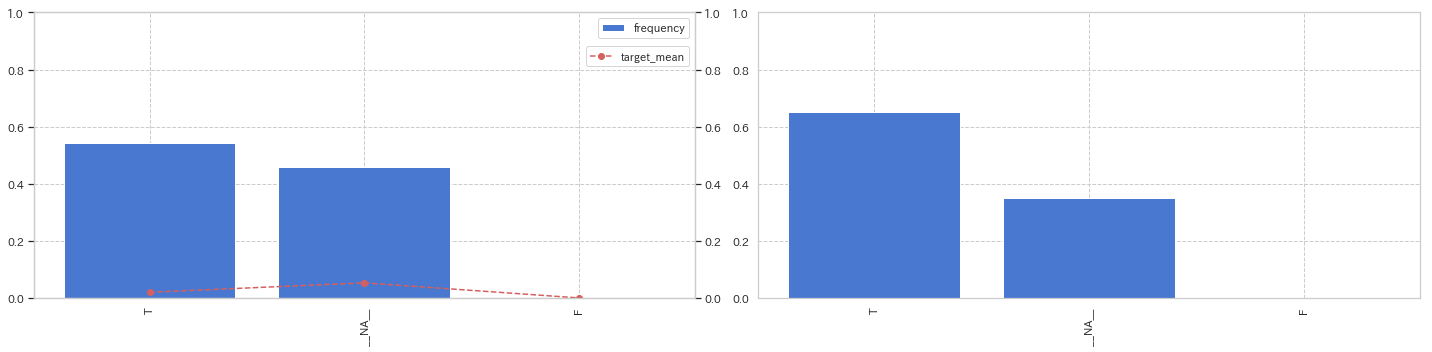

M2


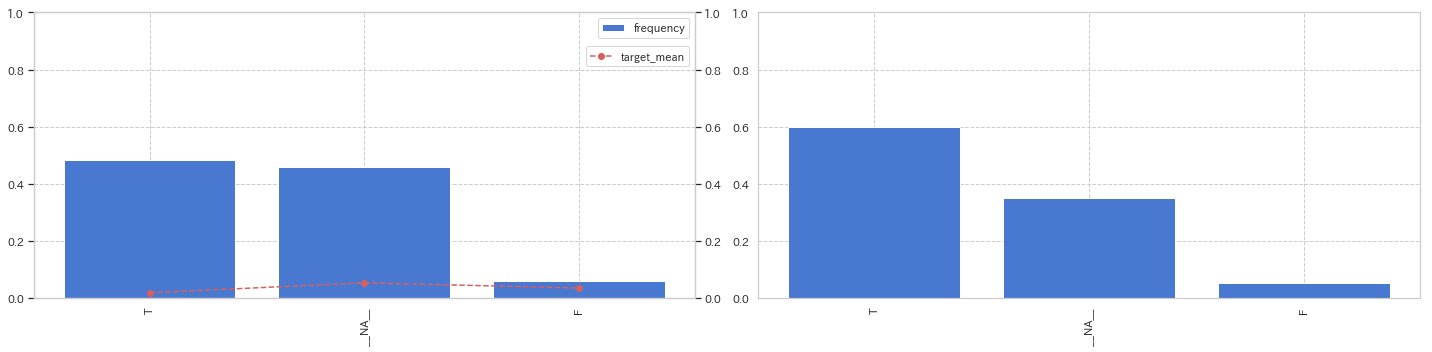

M3


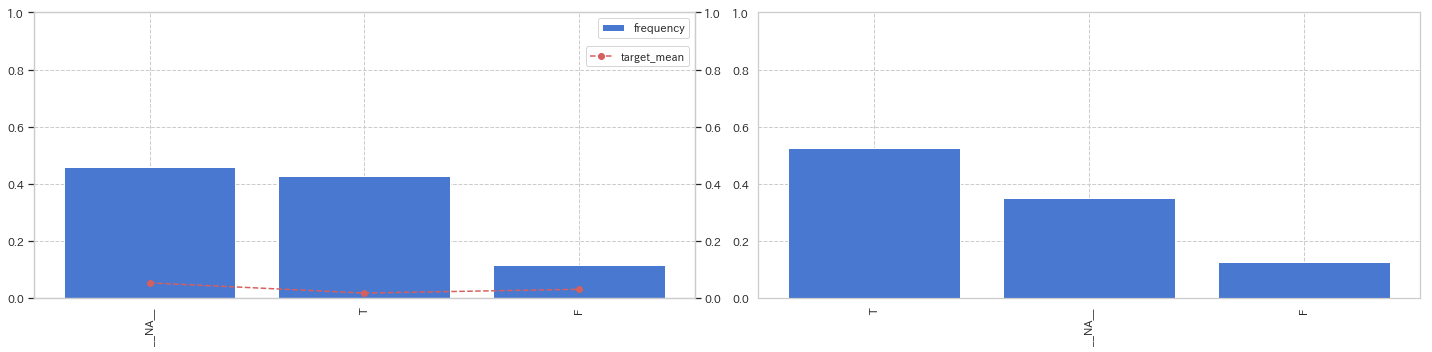

M4


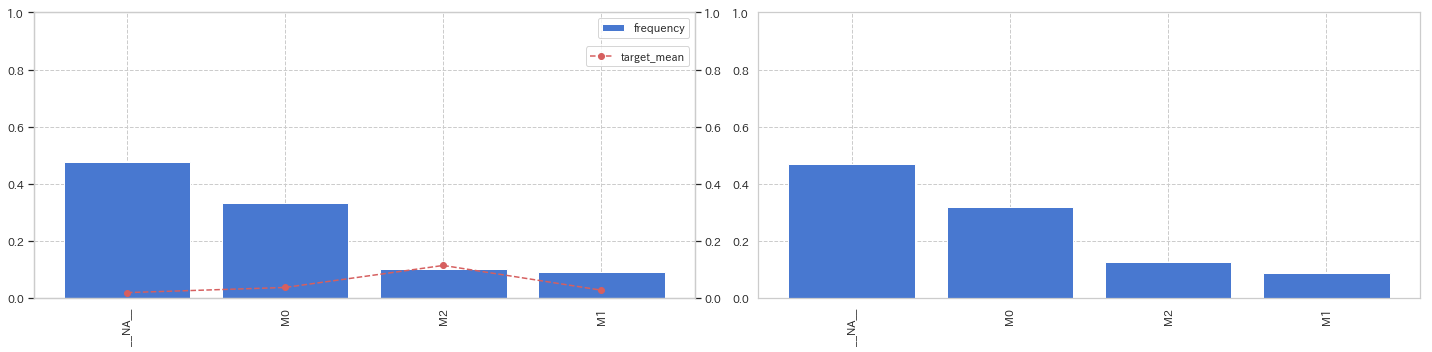

M5


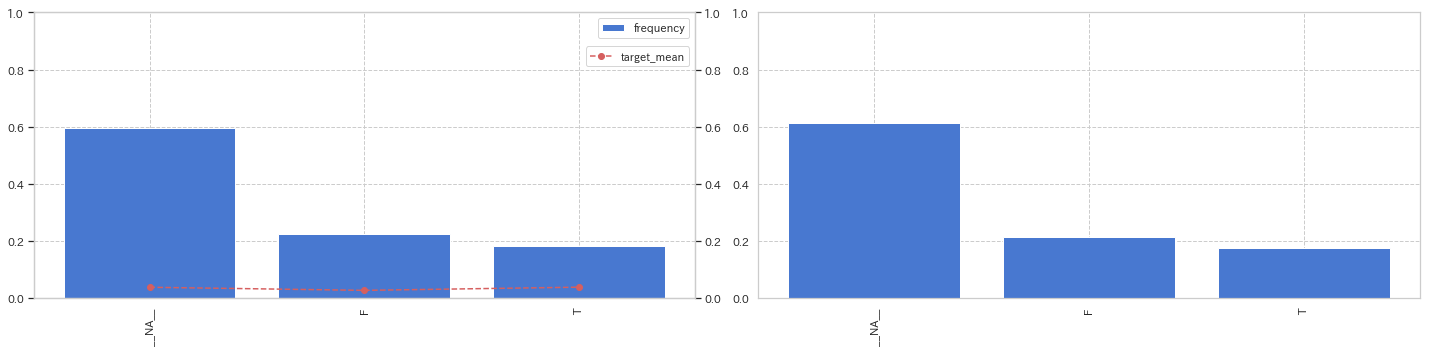

M6


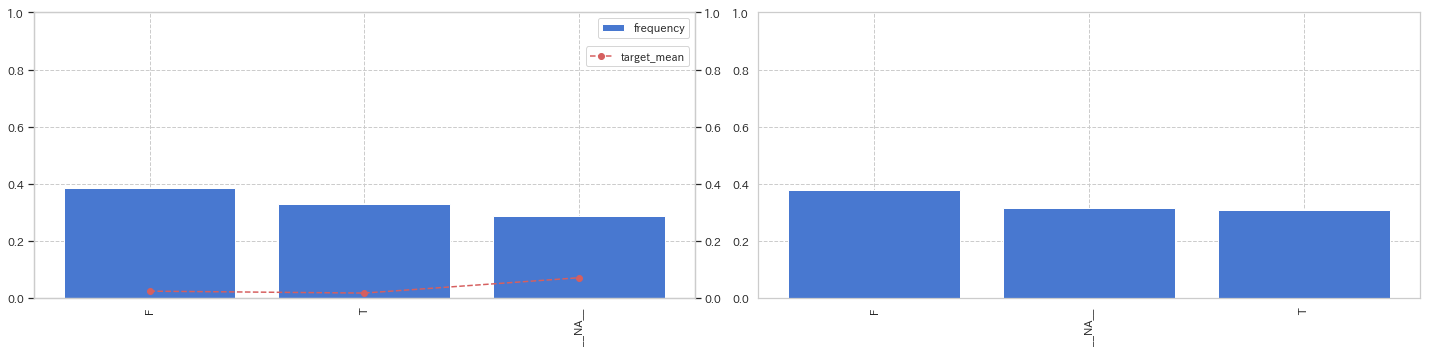

M7


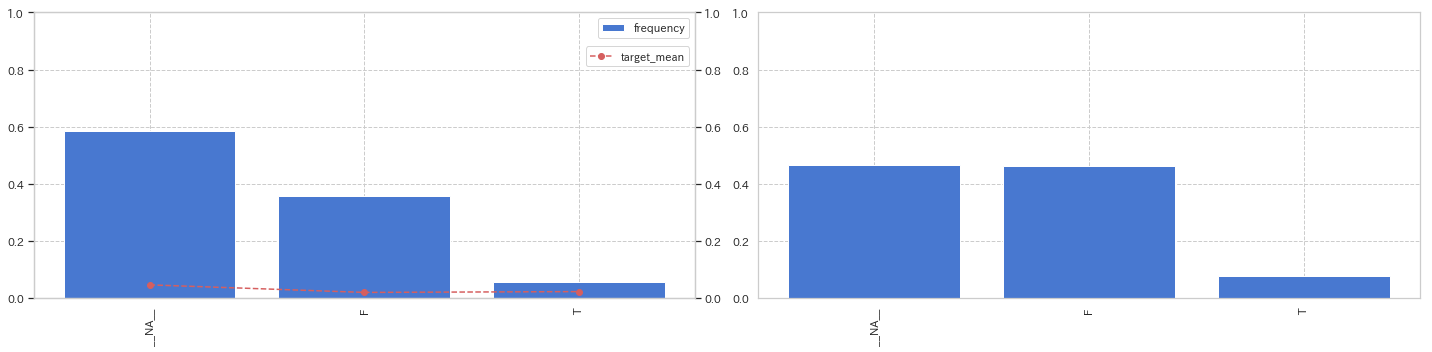

M8


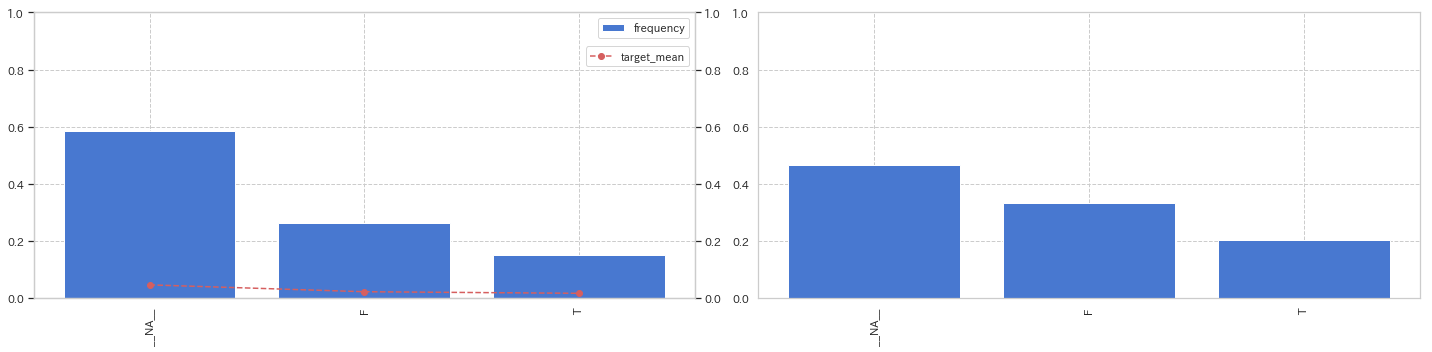

M9


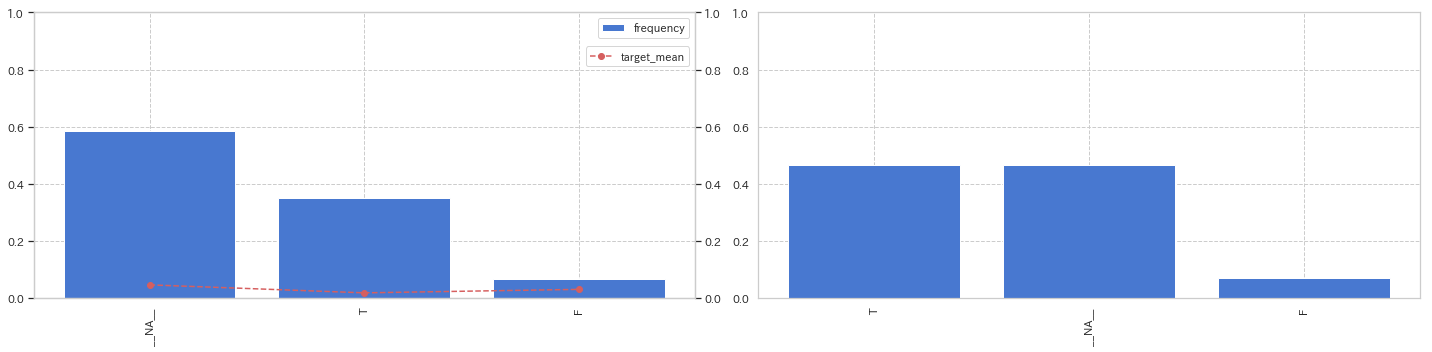

id_12


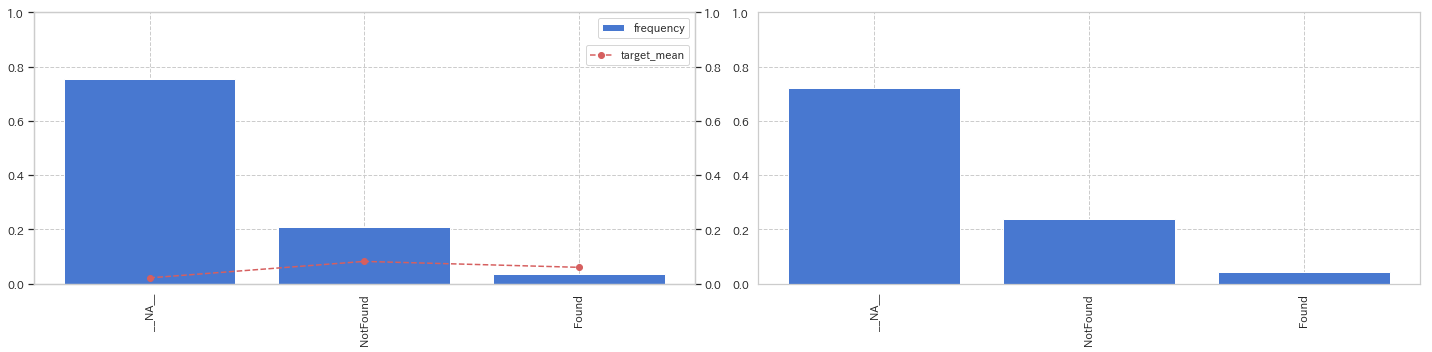

id_15


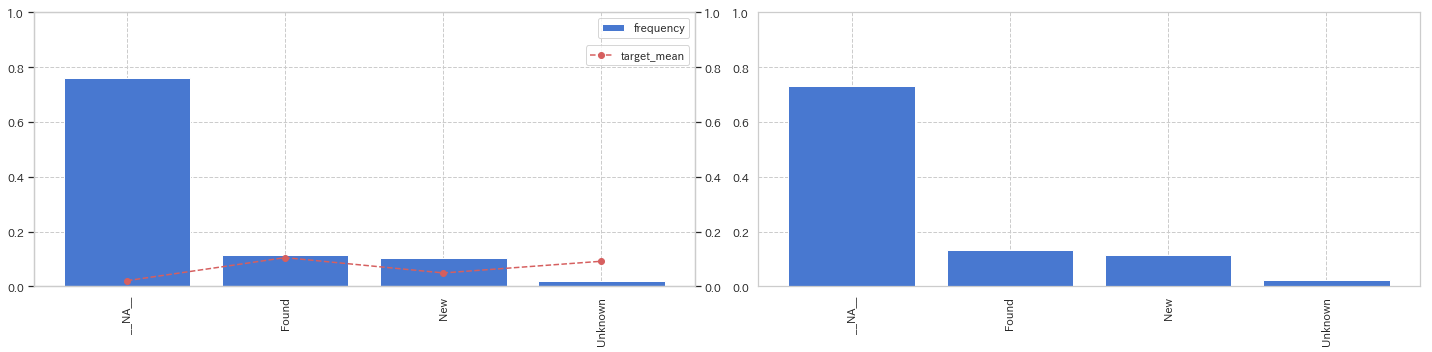

id_16


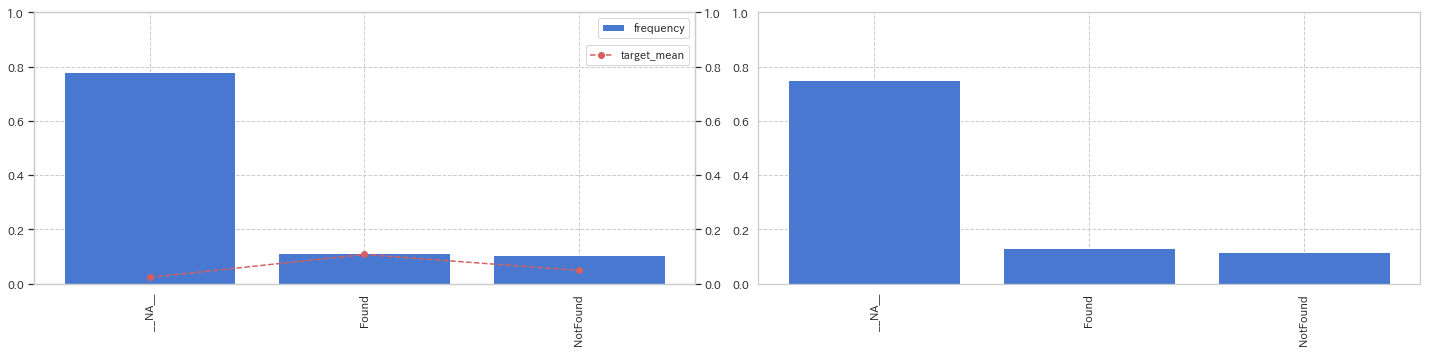

id_23


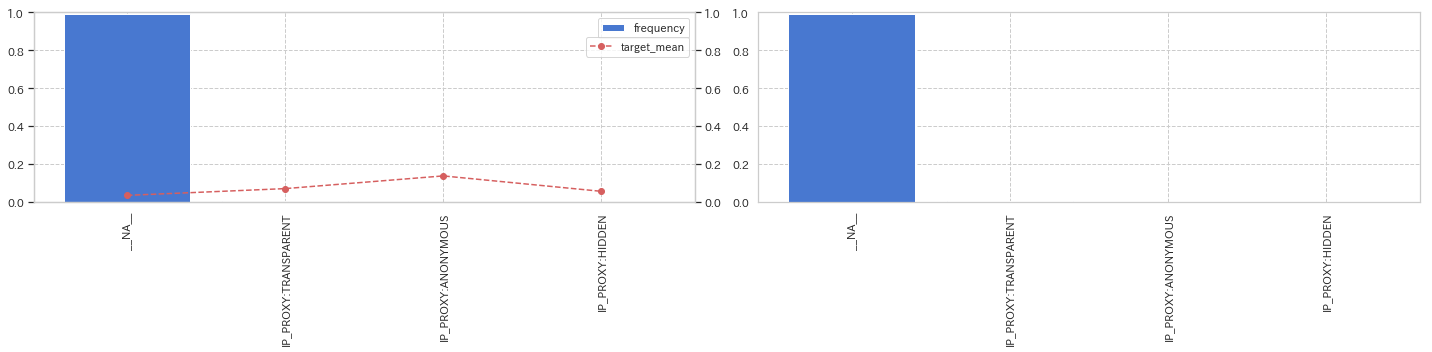

id_27


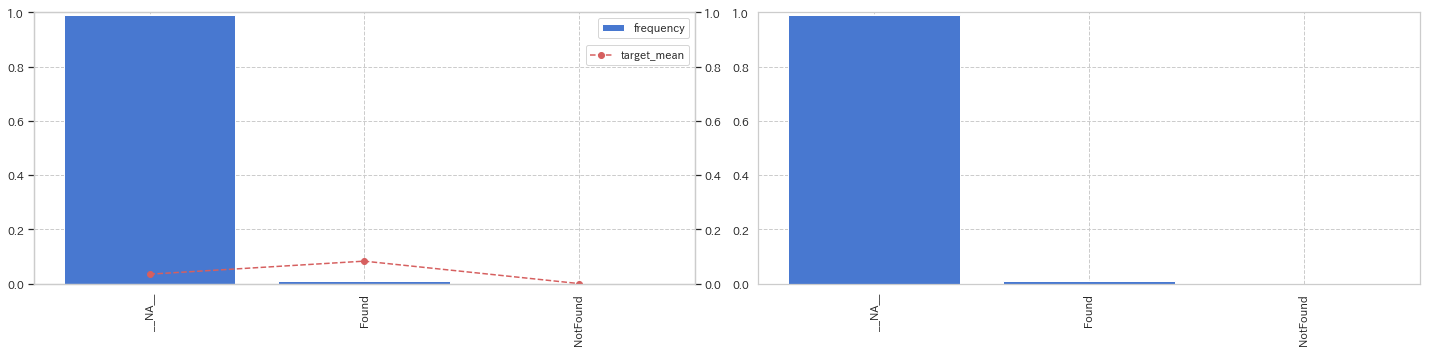

id_28


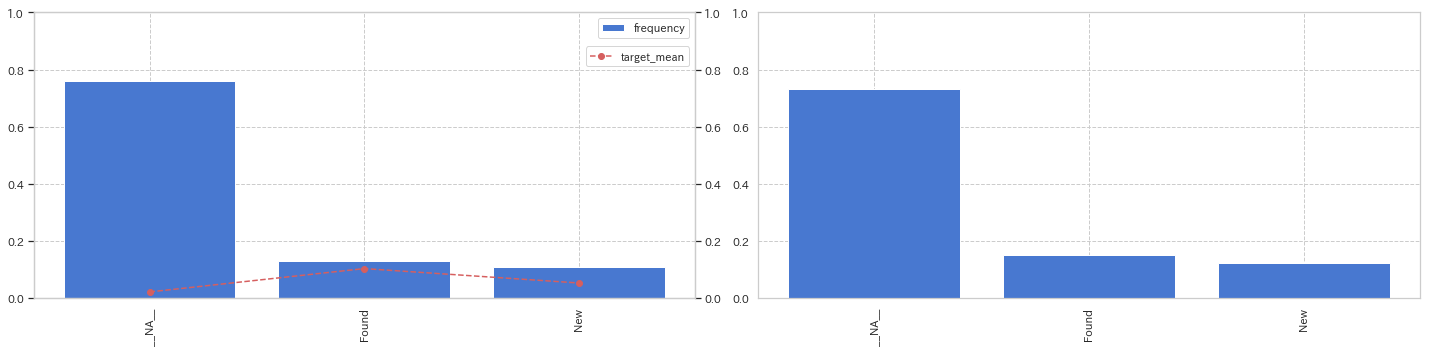

id_29


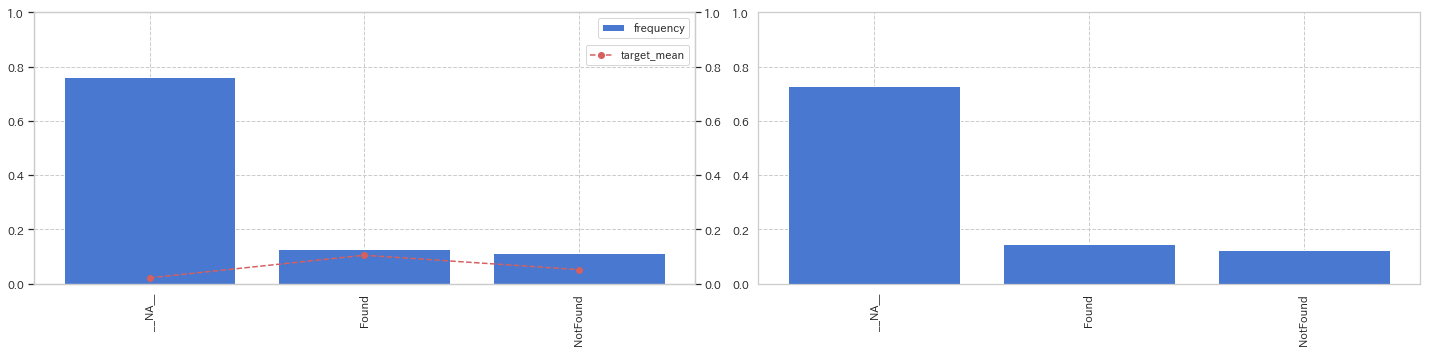

id_30


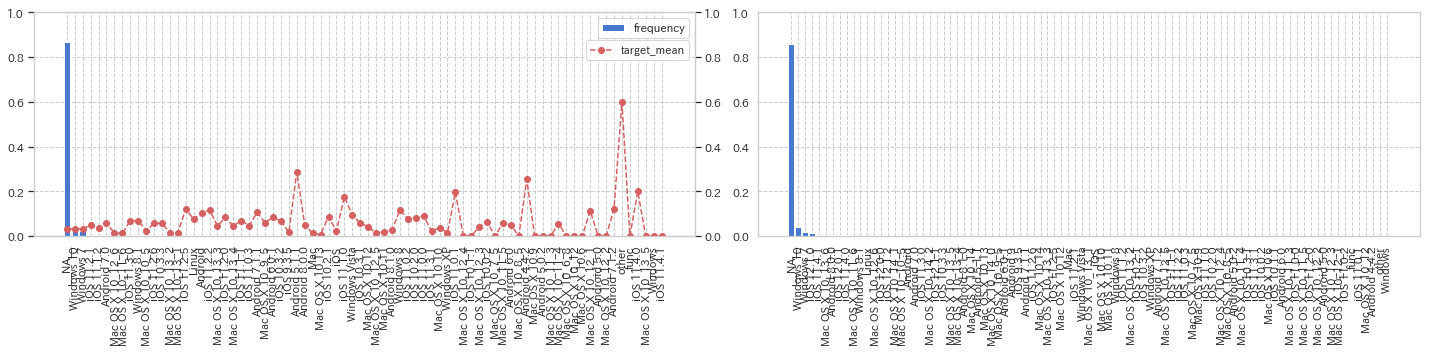

id_31


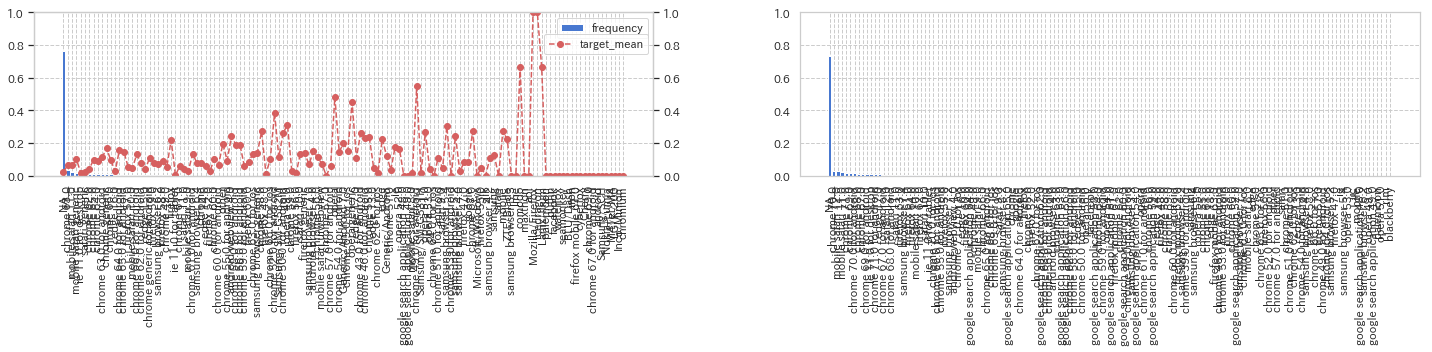

id_33


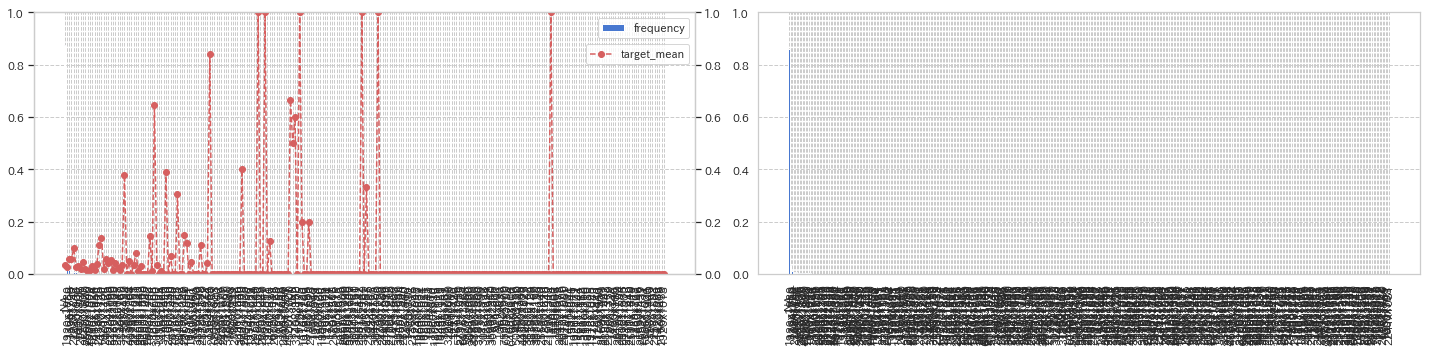

id_34


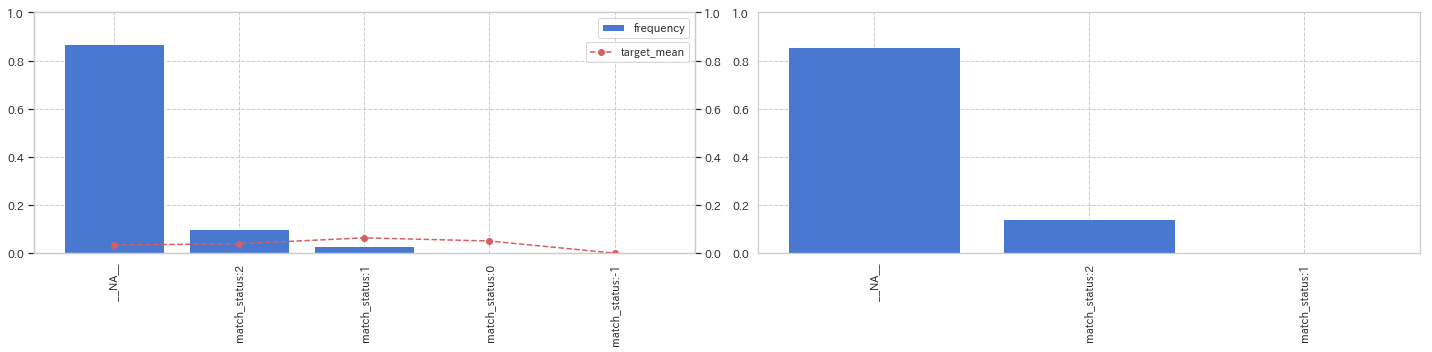

id_35


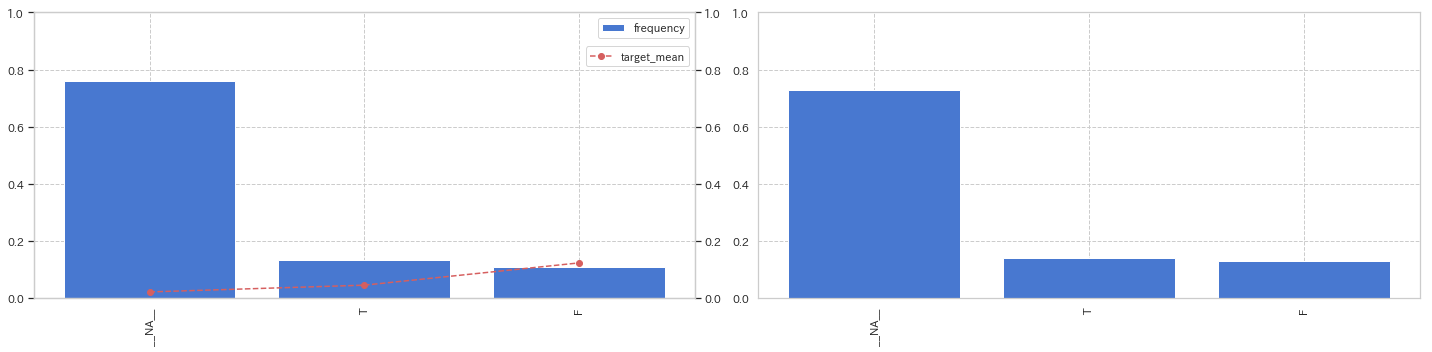

id_36


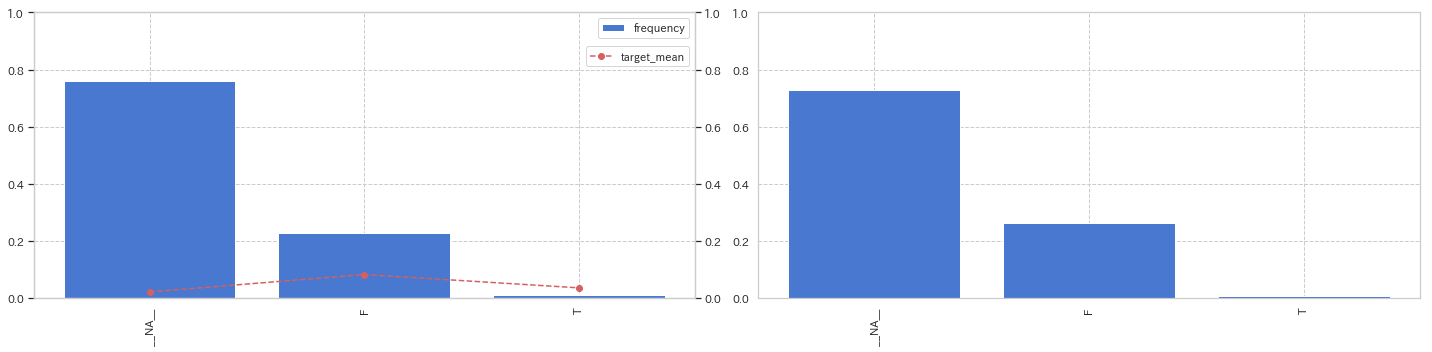

id_37


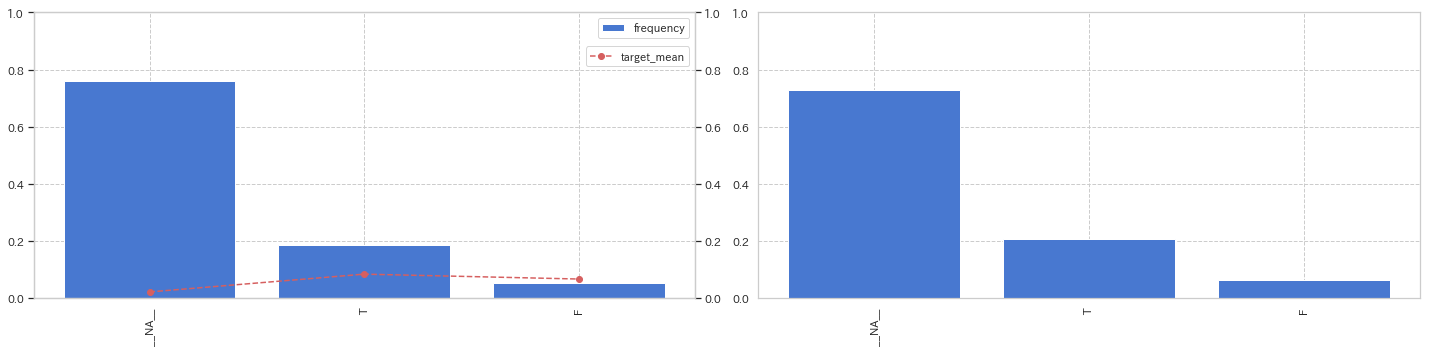

id_38


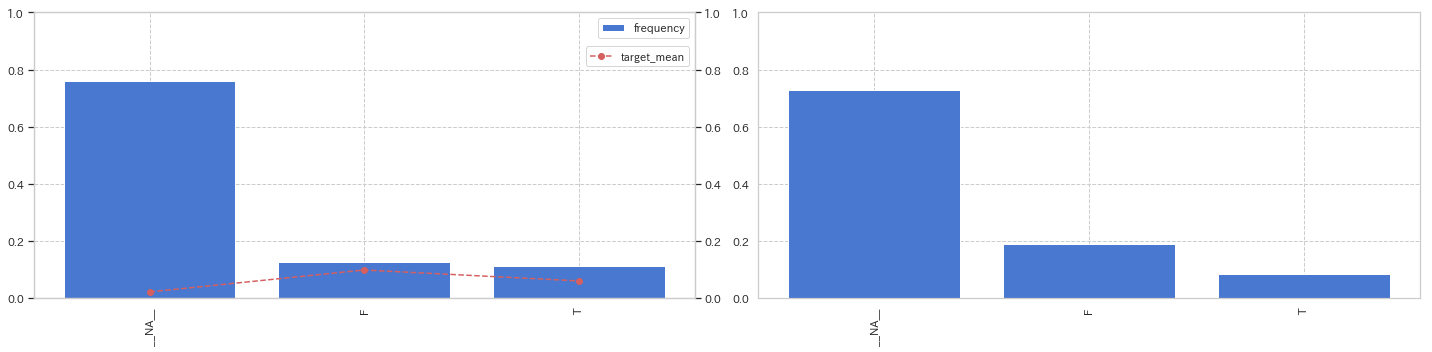

DeviceType


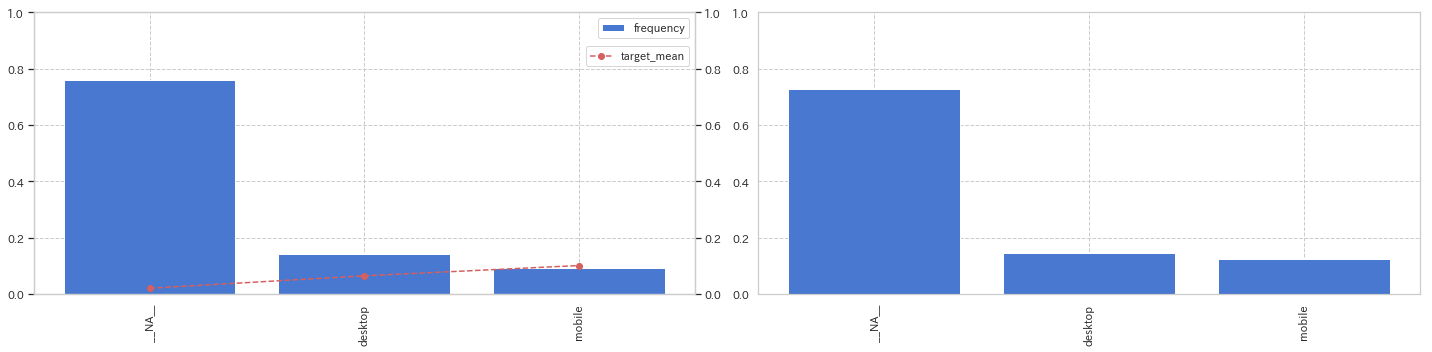

DeviceInfo


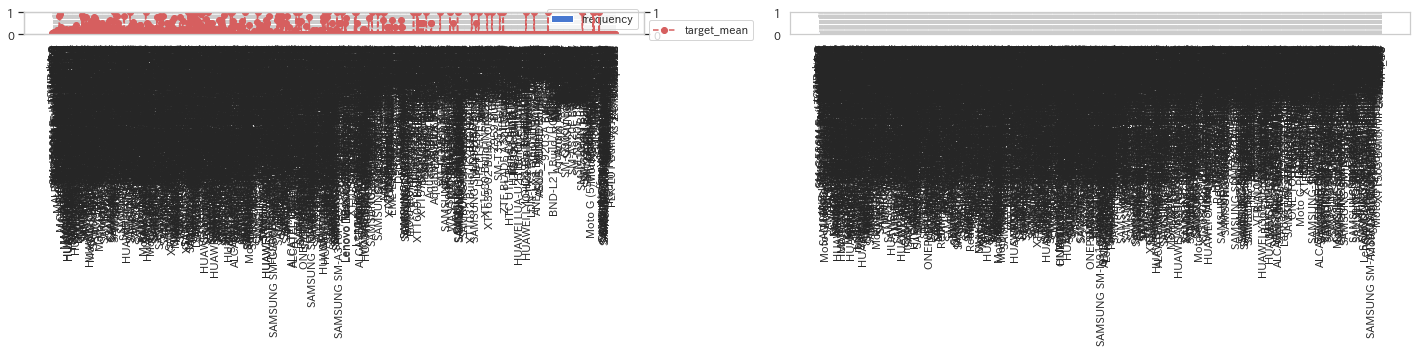

In [5]:
EDA.category_vs_target(train, test, categorical_features, 'isFraud', fillna=True, figsize=(20, 5), sort='freq', rotation=90)

DeviceInfo


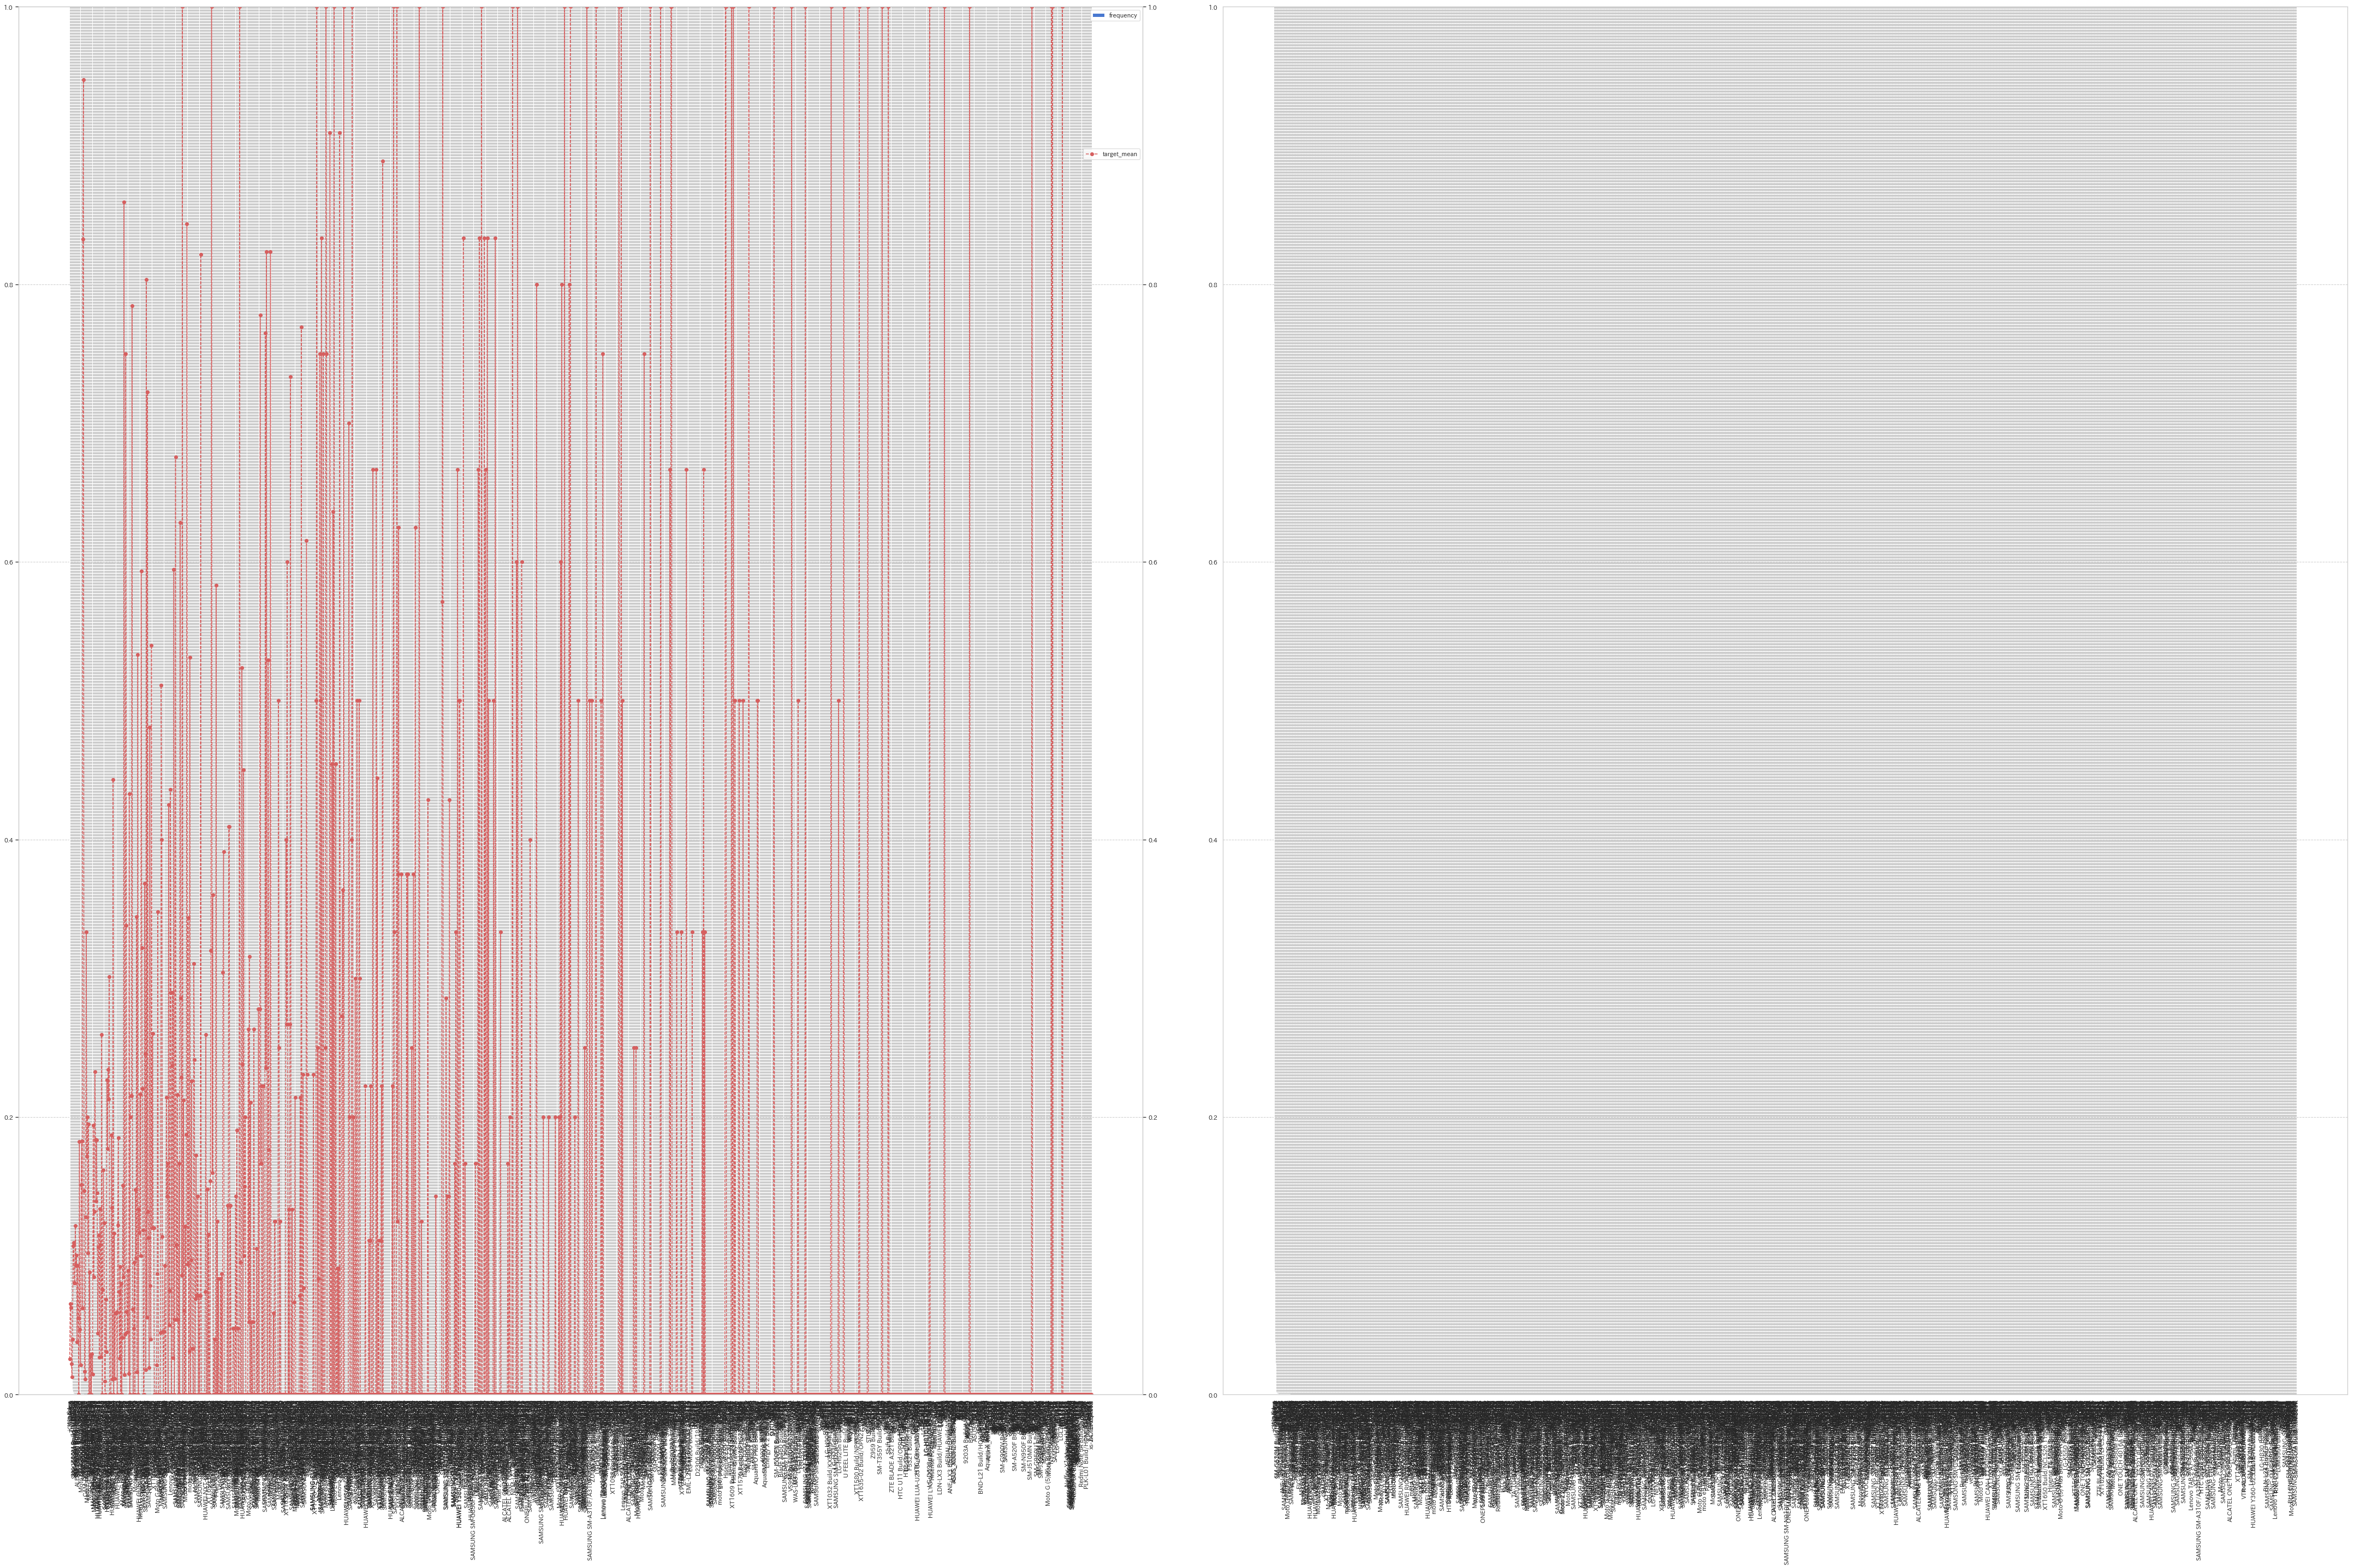

In [7]:
EDA.category_vs_target(train, test, categorical_features=['DeviceInfo'], target_column='isFraud', fillna=True, figsize=(60, 40), sort='freq', rotation=90)

DeviceInfo


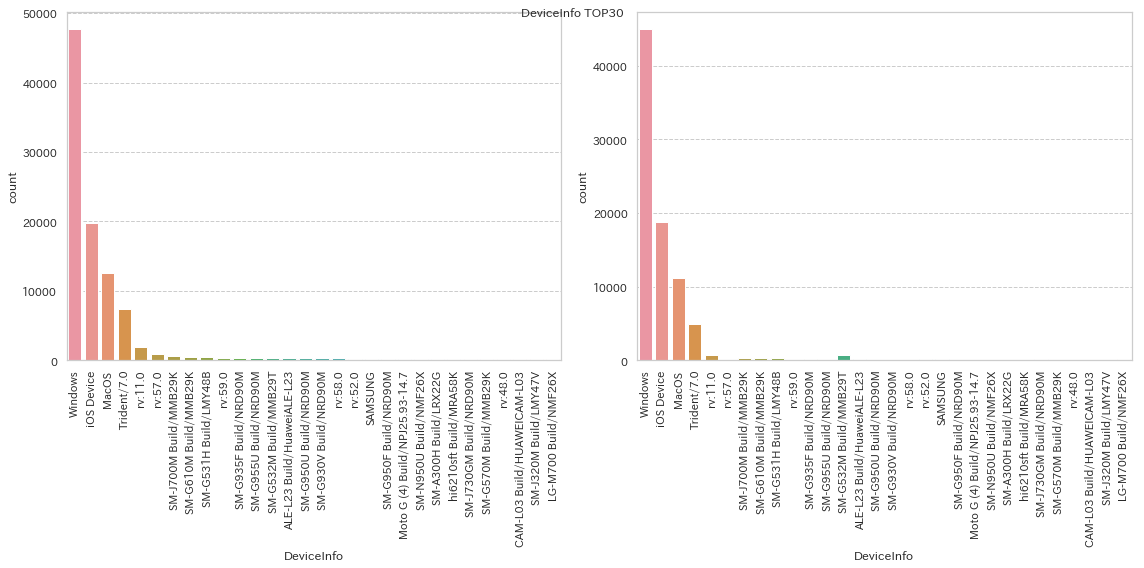

In [5]:
EDA.count_plot(train, test=test, categorical_features=['DeviceInfo'], rotation=90, figsize=(16, 8))

In [25]:
vc = train['DeviceInfo'].value_counts(normalize=True).to_frame().head(50)
order = vc.index

DeviceInfo


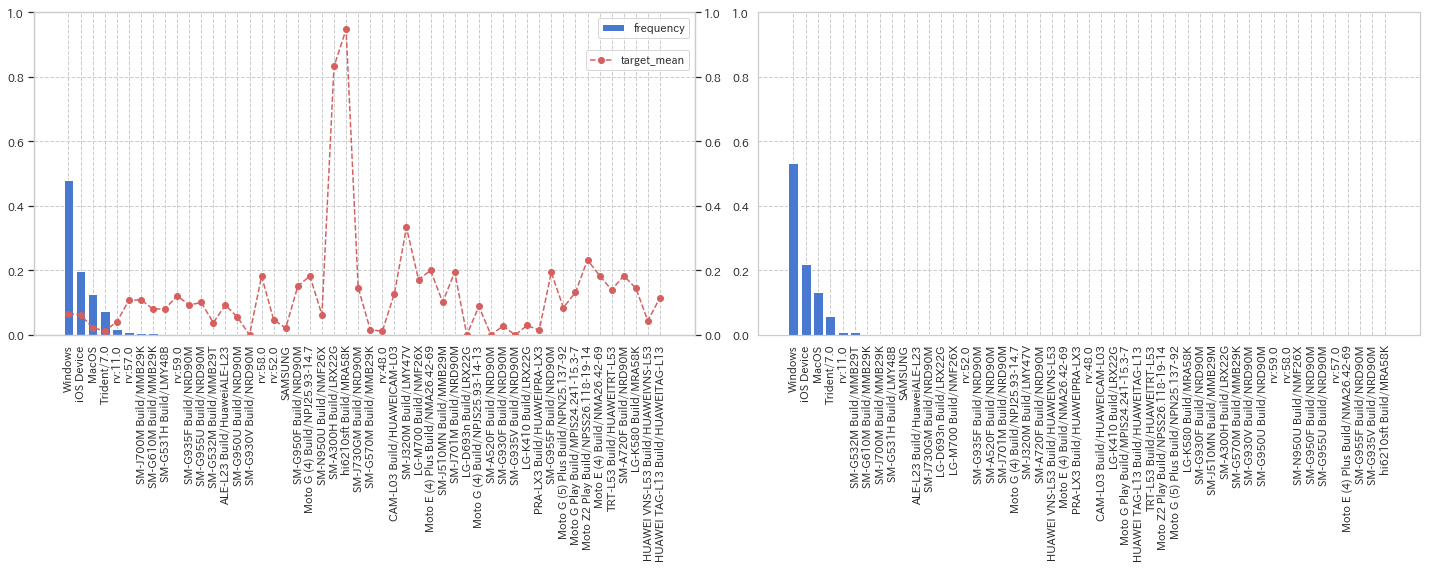

In [31]:
EDA.category_vs_target(
    train[train['DeviceInfo'].isin(order)],
    test[test['DeviceInfo'].isin(order)],
    categorical_features=['DeviceInfo'],
    target_column='isFraud',
    fillna=True,
    figsize=(20, 8),
    rotation=90,
    sort='freq'
)

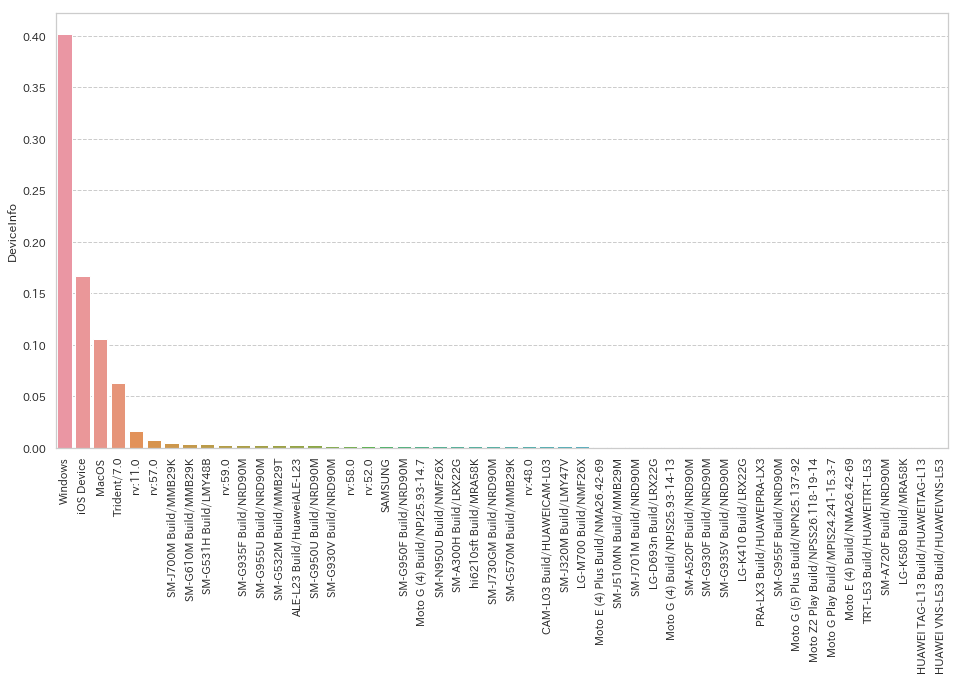

In [24]:
plt.figure(figsize=(16, 8))
vc = train['DeviceInfo'].value_counts(normalize=True).to_frame().head(50)
sns.barplot(x=vc.index, y='DeviceInfo', data=vc);
plt.xticks(rotation=90);

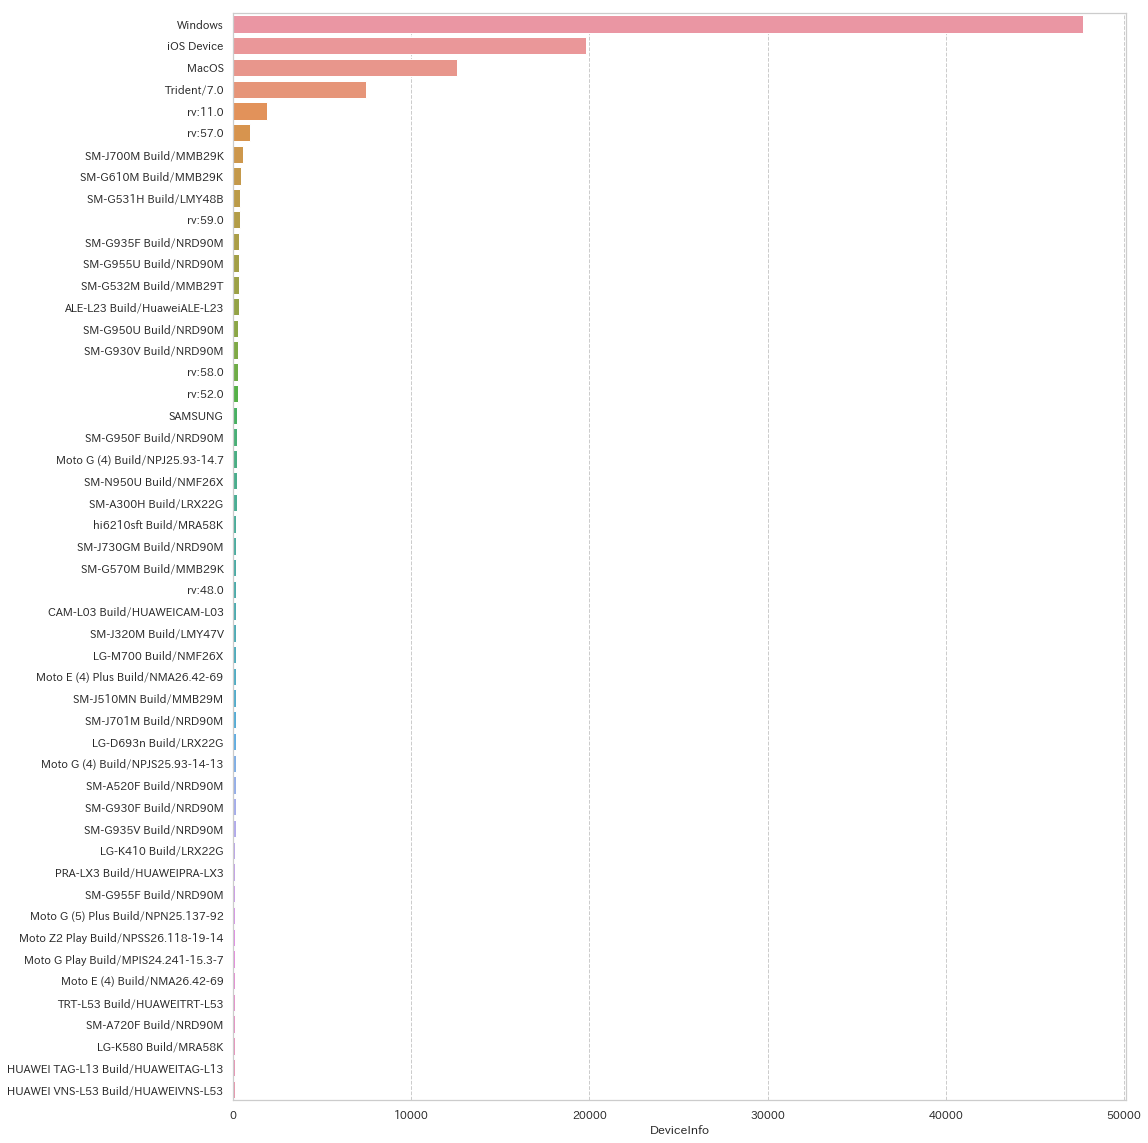

In [22]:
plt.figure(figsize=(16, 20))
vc = train['DeviceInfo'].value_counts(normalize=False).to_frame().head(50)
sns.barplot(y=vc.index, x='DeviceInfo', data=vc);

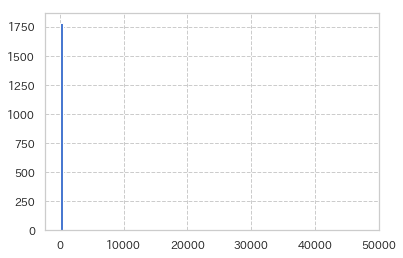

In [11]:
plt.hist(train['DeviceInfo'].value_counts().values, bins=100);